# Criando uma apresentação executiva
- Vamos usar a base de vendas do kaggle disponível em:
    - https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

### O que queremos responder?
- Como foi a **venda** nesse período?
- Qual foi a **category mais vendida**?
- Qual foi o **item mais vendido**?


In [1]:
import pandas as pd

### 1. Importando e visualizando a base
- Base: "Criando uma apresentação executiva.csv"

In [2]:
# Importando as bibliotecas e a base
df = pd.read_csv("Criando uma apresentação executiva.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### 2. Entendendo e tratando a base

In [3]:
# Visualizando as informações da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'Country', 'City', 'State', 'PostalCode',
       'Region', 'ProductID', 'Category', 'Sub-Category', 'ProductName',
       'Sales'],
      dtype='object')

**Apenas código postal possui valores nulos, podemos visualizar quais linhas não possuem esse valor**

In [5]:
# Verificando os registros com Postal Code vazio
pCodeIsNull = df['PostalCode'].isnull()
df[pCodeIsNull]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


**Todos os registros sem código postal são da cidade de Burlington, em Vermont. Será que algum registro dessa cidade possui código postal?**

In [6]:
# Verificando se existe algum registro de Burlington, Vermont com Postal Code
checkBurlington=(df['City']=='Burlington') & (df['PostalCode'].notnull())
df[checkBurlington] 

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales
683,684,US-2018-168116,04/11/2018,04/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980
684,685,US-2018-168116,04/11/2018,04/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,167.440
1008,1009,US-2018-106705,26/12/2018,01/01/2019,Standard Class,PO-18850,Patrick O'Brill,Consumer,United States,Burlington,Iowa,52601.0,Central,OFF-PA-10001509,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",44.750
1038,1039,CA-2018-121818,20/11/2018,21/11/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10000203,Office Supplies,Art,Newell 336,23.968
1039,1040,CA-2018-121818,20/11/2018,21/11/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10004790,Office Supplies,Art,Staples in misc. colors,28.728
1393,1394,CA-2018-124828,03/07/2018,04/07/2018,First Class,YS-21880,Yana Sorensen,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10003514,Office Supplies,Art,4009 Highlighters by Sanford,9.552
2928,2929,US-2018-120390,19/10/2018,26/10/2018,Standard Class,TH-21550,Tracy Hopkins,Home Office,United States,Burlington,North Carolina,27217.0,South,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1633.188
5065,5066,CA-2018-142090,30/11/2018,07/12/2018,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,TEC-AC-10002001,Technology,Accessories,Logitech Wireless Gaming Headset G930,383.976
5066,5067,CA-2018-142090,30/11/2018,07/12/2018,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,FUR-TA-10001889,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1781.682
8317,8318,CA-2018-130904,11/04/2018,16/04/2018,Standard Class,HM-14980,Henry MacAllister,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10000422,Office Supplies,Art,Pencil and Crayon Sharpener,1.752


**Podemos ir diretamente no google para buscar essa informação**

![Criando20executiva.png](./img/searchGoogle.png)

In [7]:
# Atualizando essa informação
df.loc[(df.City == 'Burlington') & (df.State == 'Vermont') & (df['PostalCode'].isnull()),"PostalCode"] = 5401

In [8]:
# Verificando se ainda existe algum valor nulo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RowID         9800 non-null   int64  
 1   OrderID       9800 non-null   object 
 2   OrderDate     9800 non-null   object 
 3   ShipDate      9800 non-null   object 
 4   ShipMode      9800 non-null   object 
 5   CustomerID    9800 non-null   object 
 6   CustomerName  9800 non-null   object 
 7   Segment       9800 non-null   object 
 8   Country       9800 non-null   object 
 9   City          9800 non-null   object 
 10  State         9800 non-null   object 
 11  PostalCode    9800 non-null   float64
 12  Region        9800 non-null   object 
 13  ProductID     9800 non-null   object 
 14  Category      9800 non-null   object 
 15  Sub-Category  9800 non-null   object 
 16  ProductName   9800 non-null   object 
 17  Sales         9800 non-null   float64
dtypes: float64(2), int64(1), obj

In [9]:
# Visualizando novamente as informações da base
df.loc[(df['City'] == 'Burlington') & (df['State'] == 'Vermont') & (df['PostalCode'].isnull())]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales


### 3. <font> Como foi a venda nesse período? </font>
Aqui temos 2 questões que precisamos pensar:
- **Quais <font>colunas</font> vamos usar?**
    - Podemos verificar a venda na coluna "Sales""
    - O período nós podemos usar a coluna "Order Date", mas precisamos entender melhor essa coluna
- **Qual o <font>período</font> queremos exibir?**

In [10]:
# Para entender a data, podemos ver de qual período estamos falando
df['OrderDate'].min()

'01/01/2018'

**<font color="red">CUIDADO:</font> Se a coluna de data estiver como texto e não como data, a ordenação vai ser pelo texto e não pela data!**

**Podemos converter uma coluna para data usando o to_datetime do pandas**
<br><br>
base["coluna"] = pd.**to_datetime(**base["coluna"]**)**
- No datetime, caso tenha apenas a data, a hora ficaria como 00:00:00
- Se quisermos considerar apenas a data, podemos usar o **.date** da biblioteca **datetime**

In [11]:
import datetime as dt

In [12]:
# Convertendo as colunas de data para datetime
df["OrderDate"] = pd.to_datetime(df["OrderDate"].astype(str), format='%d/%m/%Y')
df["ShipDate"] = pd.to_datetime(df["ShipDate"].astype(str), format='%d/%m/%Y')

In [13]:
# Para entender a data, podemos ver de qual período estamos falando
df['OrderDate'].min()

Timestamp('2015-01-03 00:00:00')

In [14]:
# Buscando o máximo da data
df['OrderDate'].max()

Timestamp('2018-12-30 00:00:00')

- Estamos falando de 4 Years de análise, começando em jan/2015 e indo até dez/2018

#### Como estamos falando de um período grande de Years, podemos começar a visualização pelos Years
- Para isso, podemos usar o **.year** da biblioteca datetime para criar uma nova coluna apenas com o Year dessa base

# Venda por Year

In [15]:
# Criando uma coluna com o Year
df['Year'] = df['OrderDate'].dt.year

#### Lembram do groupby()?

<Axes: xlabel='Year'>

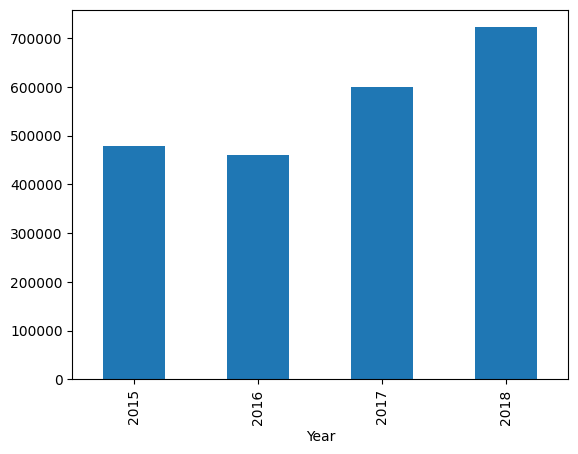

In [16]:
# Usando essa coluna no group by e criando um plot de barras
df.groupby("Year")["Sales"].sum().plot.bar()

## Melhorando o visual desse gráfico
- Como já vimos no último tópico, podemos melhorar muito a visualização desse gráfico. Vamos fazer isso!
- Primeiramente vamos traçar um gráfico usando o que aprendemos de matplotlib
    - https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py
    - Sugestão de cor: `#84ba5b`

In [17]:
import matplotlib.pyplot as plt
import numpy as np

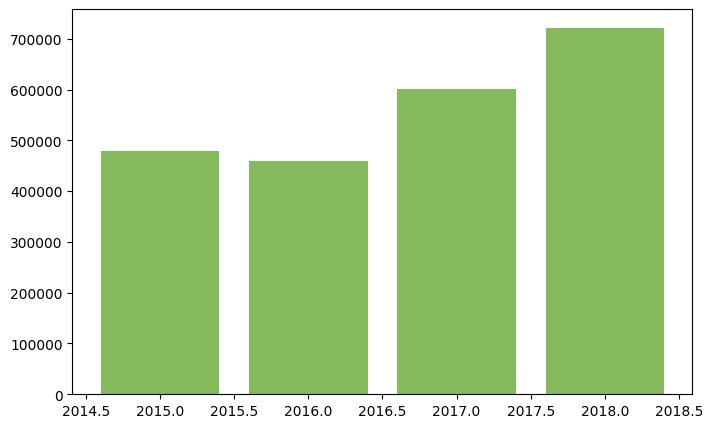

In [18]:
# Criando um gráfico com o matplotlib usando o groupby
fig, ax = plt.subplots(figsize=(8,5)) # Tamanho da figura

sum_year = df.groupby("Year")["Sales"].sum()

ax.bar(sum_year.index, sum_year.values, linewidth=2.0, color='#84ba5b')

plt.show()

**Adicionando o título e melhorando os textos do eixo**
- Vamos adicionar o título e melhorar o eixo x
    - O `.set_title` vai permitir colocar título e ajustar os parâmetros desse títulos
        - fontsize: Tamanho da fonte
        - fontweight: Espessura da fonte
        - color: Cor da fonte
    - O `xaxis.set_ticks` vai definir os valores mostrados no eixo x
    - O `.tick_params(axis='x')` vai ajustar o parâmetro do eixo x
        - labelsize: tamanho do label

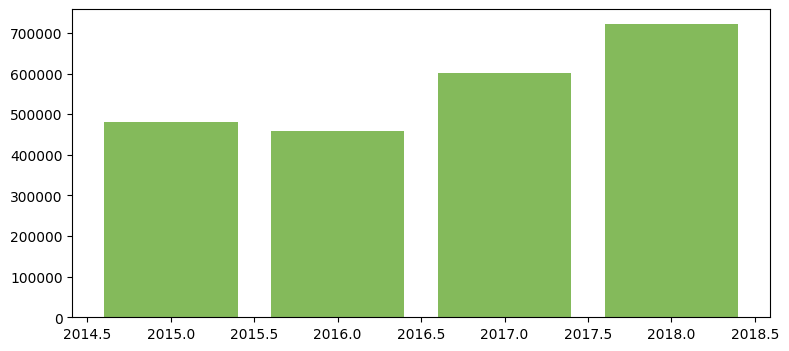

In [19]:
fig,ax = plt.subplots(figsize = (9,4)) # Tamanho da figura
sum_year = df.groupby("Year")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico
ax.bar(sum_year.index,sum_year.values, color="#84ba5b") # Cor das barras
plt.show()

**Adicionando o rótulo de dados**
- Para adicionar rótulo de dados, vamos usar o `.annotate` como vimos na última aula

In [20]:
import numpy as np

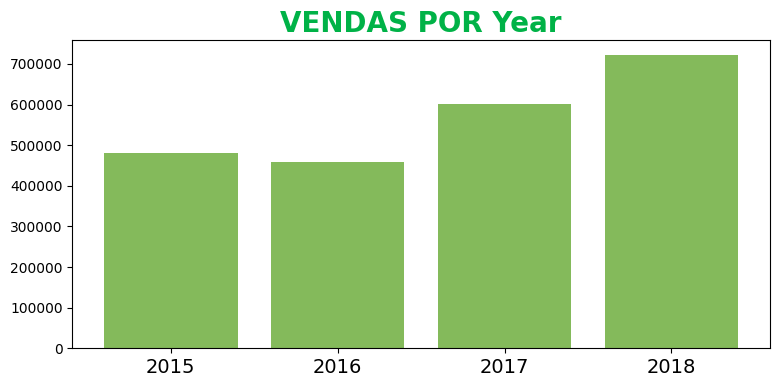

In [ ]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

sum_year = df.groupby("Year")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

ax.bar(sum_year.index,sum_year.values,
       color="#84ba5b" # Cor das barras
      )

ax.set_title("Sales By Year", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

plt.show()

**Melhorando a visualização do gráfico**
- Para o eixo y, podemos fazer igual fizemos para o eixo x
    - Com o `.set_yticks` vamos ajustar os valores do eixo y
    - O `.yaxis.set_visible(False)` permite retirar os valores do eixo y, tornando nosso visual mais claro
- Já para retirar as bordas do gráfico, basta usar o `.spines['top'].set_visible(False)`

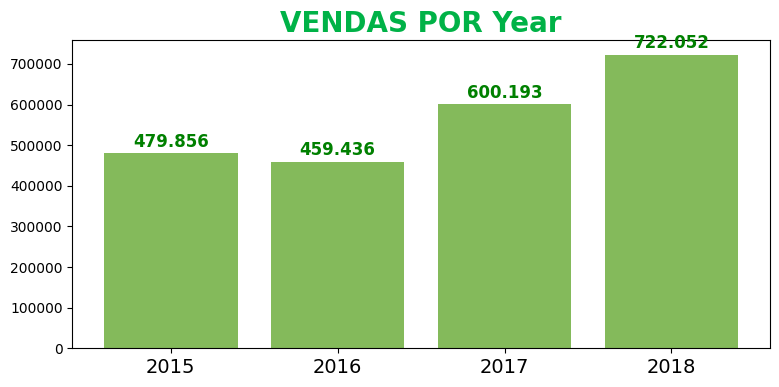

In [22]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

sum_year = df.groupby("Year")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

ax.bar(sum_year.index,sum_year.values,
       color="#84ba5b" # Cor das barras
      )

ax.set_title("VENDAS POR Year", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,4):
    ax.annotate('{:,.0f}'.format(sum_year.values[i]).replace(',', '.'), # Valores que vão ser mostrados como rótulos, já formatados
                (sum_year.index[i],sum_year.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,+15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=12, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="green" # Cor dos rótulos
            )

plt.show()

**Como resultado final, teremos o gráfico abaixo**

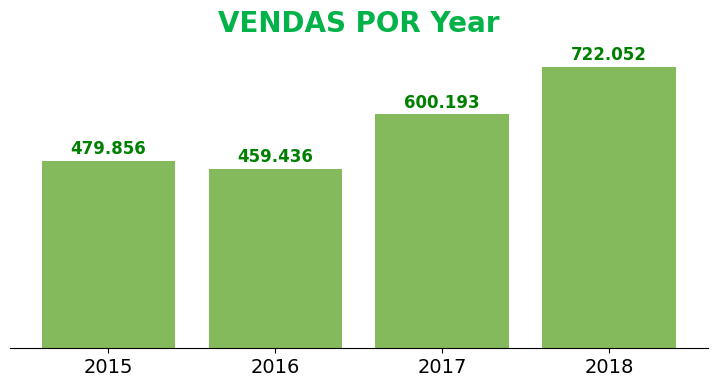

In [ ]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

sum_year = df.groupby("Year")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

ax.bar(sum_year.index,sum_year.values,
       color="#84ba5b" # Cor das barras
      )

ax.set_title("Sales By Year", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,4):
    ax.annotate('{:,.0f}'.format(sum_year.values[i]).replace(',', '.'), # Valores que vão ser mostrados como rótulos, já formatados
                (sum_year.index[i],sum_year.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,+15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=12, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="green" # Cor dos rótulos
            )
    
ax.set_yticks(np.array([0,790000])) # Diminuindo o tamanho das barras para não cortar o rótulo
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Venda por mês

#### Também podemos mostrar essa visão por meses
- Para isso, podemos usar o **.month** da biblioteca datetime para criar uma nova coluna apenas com o mês dessa base

In [24]:
# Criando uma coluna com o mês
df['Month'] =  df['OrderDate'].dt.month

In [25]:
df.head(2)

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Year,Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11


In [26]:
# Fazendo o groupby agora por mês e Year
sum_month = df.groupby(["Month","Year"])["Sales"].sum()

In [27]:
# Verificando os valores gerados
sum_month

Month  Year
1      2015     14205.7070
       2016     18066.9576
       2017     18542.4910
       2018     43476.4740
2      2015      4519.8920
       2016     11951.4110
       2017     22978.8150
       2018     19920.9974
3      2015     55205.7970
       2016     32339.3184
       2017     51165.0590
       2018     58863.4128
4      2015     27906.8550
       2016     34154.4685
       2017     38679.7670
       2018     35541.9101
5      2015     23644.3030
       2016     29959.5305
       2017     56656.9080
       2018     43825.9822
6      2015     34322.9356
       2016     23599.3740
       2017     39724.4860
       2018     48190.7277
7      2015     33781.5430
       2016     28608.2590
       2017     38320.7830
       2018     44825.1040
8      2015     27117.5365
       2016     36818.3422
       2017     30542.2003
       2018     62837.8480
9      2015     81623.5268
       2016     63133.6060
       2017     69193.3909
       2018     86152.8880
10     2015     

**Com o <font>.reset_index()</font> conseguimos transformar os índices em colunas e então aplicar todas as propriedades que conhecemos para o DataFrame**

In [28]:
# Vamos transformar os índices em colunas
sum_month = sum_month.reset_index()

In [29]:
# Visualizando a base novamente
sum_month

,Month,Year,Sales
0,1,2015,14205.7070
1,1,2016,18066.9576
2,1,2017,18542.4910
3,1,2018,43476.4740
4,2,2015,4519.8920
5,2,2016,11951.4110
6,2,2017,22978.8150
7,2,2018,19920.9974
8,3,2015,55205.7970
9,3,2016,32339.3184


**Vamos usar o gráfico que fizemos na aula anterior para ir criando esse gráfico**

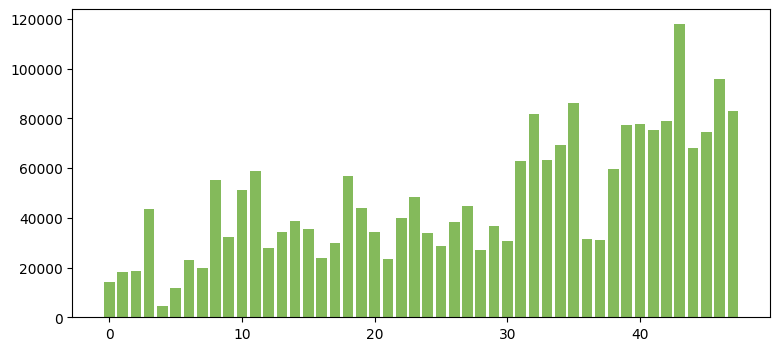

In [30]:
# Criando o gráfico de mês com o matplotlib
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

ax.bar(sum_month.index,sum_month.Sales,
       color="#84ba5b" # Cor das barras
      )

plt.show()

**Agora vamos adicionar a barra do Year de 2016**
- Vamos adicionar um gráfico de barras com os dados de 2016

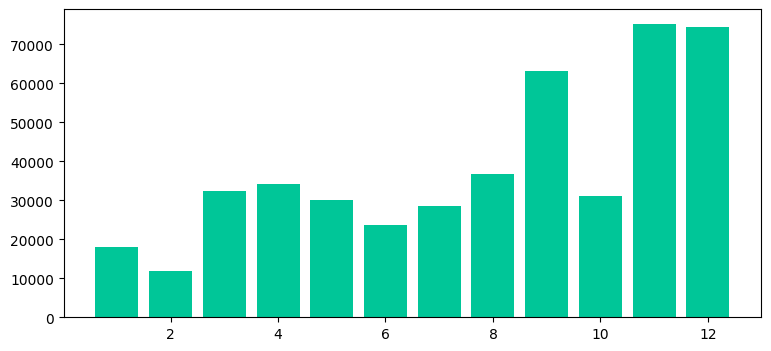

In [31]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

ax.bar(sum_month[sum_month.Year == 2016].Month.values,sum_month[sum_month.Year == 2016].Sales.values,
       color="#00c698", # Cor das barras
       label=2015 # Label dos dados
      )

plt.show()

**E então, deslocar as barras**
- Para isso, vamos usar o mesmo raciocínio do width que usamos na aula anterior
    - Para diferenciar os dados, também podemos usar o `label` para informar qual é cada um dos gráficos

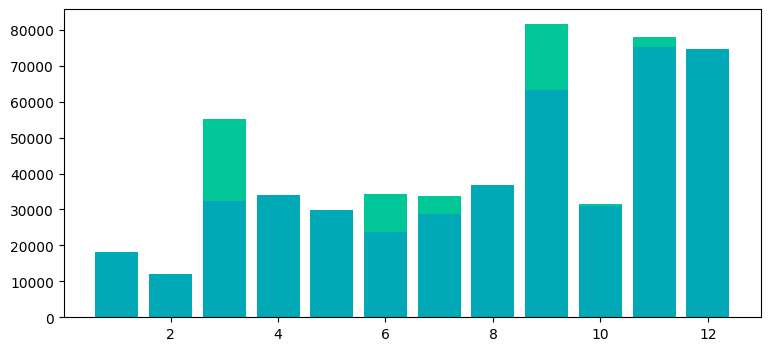

In [32]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

ax.bar(sum_month[sum_month.Year == 2015].Month.values,
       sum_month[sum_month.Year == 2015].Sales.values,
       color="#00c698"
      )
ax.bar(sum_month[sum_month.Year == 2016].Month.values, 
       sum_month[sum_month.Year == 2016].Sales.values,
       color="#00a9b5"
      )

plt.show()

**Podemos agora adicionar todas as barras**

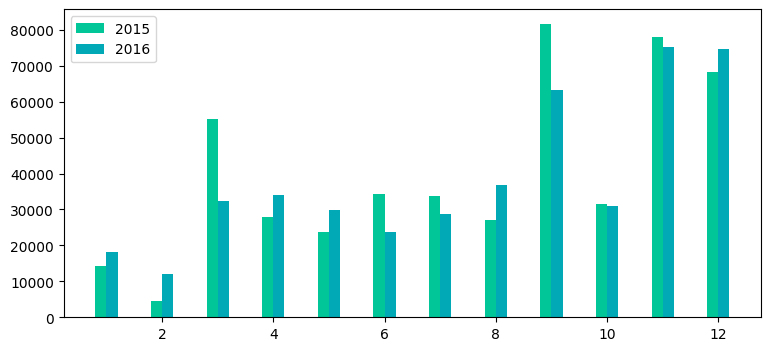

In [33]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

### VAMOS AJUSTAR ESSA PARTE DO CÓDIGO ADICIONANDO AS PARTES DO TAMANHO DAS BARRAS
wid = 0.2

ax.bar(sum_month[sum_month.Year == 2015].Month.values-wid/2, # <- DESLOCANDO A BARRA PARA A ESQUERDA
       sum_month[sum_month.Year == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )

ax.bar(sum_month[sum_month.Year == 2016].Month.values+wid/2, # <- DESLOCANDO A BARRA PARA A DIREITA
       sum_month[sum_month.Year == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

ax.legend()

plt.show()

**E vamos colocar rótulo apenas em 2018 para não poluir muito o gráfico**

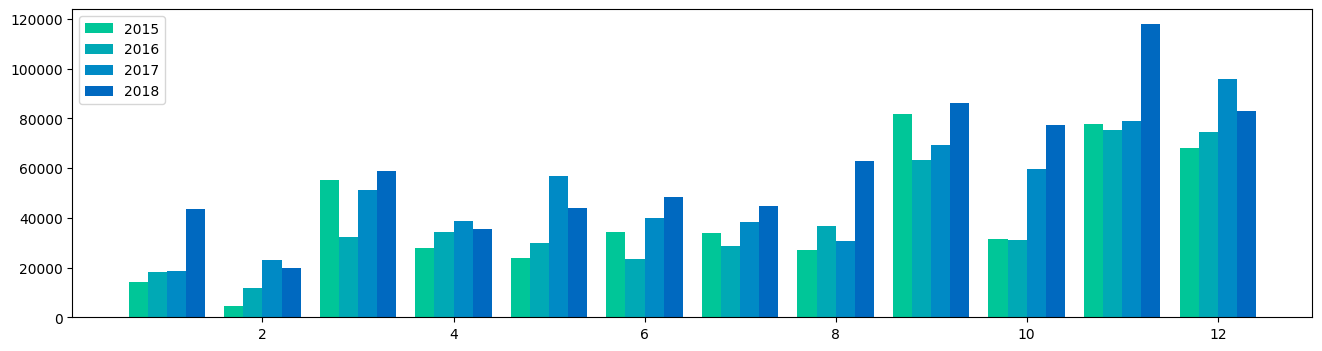

In [34]:
fig,ax = plt.subplots(
            figsize = (16,4) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(sum_month[sum_month.Year == 2015].Month.values-wid-wid/2, # Ajuste da posição das barras
       sum_month[sum_month.Year == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(sum_month[sum_month.Year == 2016].Month.values-wid/2, # Ajuste da posição das barras
       sum_month[sum_month.Year == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

# Adicionando o restante das barras
ax.bar(sum_month[sum_month.Year == 2017].Month.values+wid/2, # Ajuste da posição das barras
       sum_month[sum_month.Year == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(sum_month[sum_month.Year == 2018].Month.values+wid+wid/2, # Ajuste da posição das barras
       sum_month[sum_month.Year == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )
ax.legend()
    
plt.show()

**Melhorando o visual retirando as bordas e ajustando o texto do eixo x**

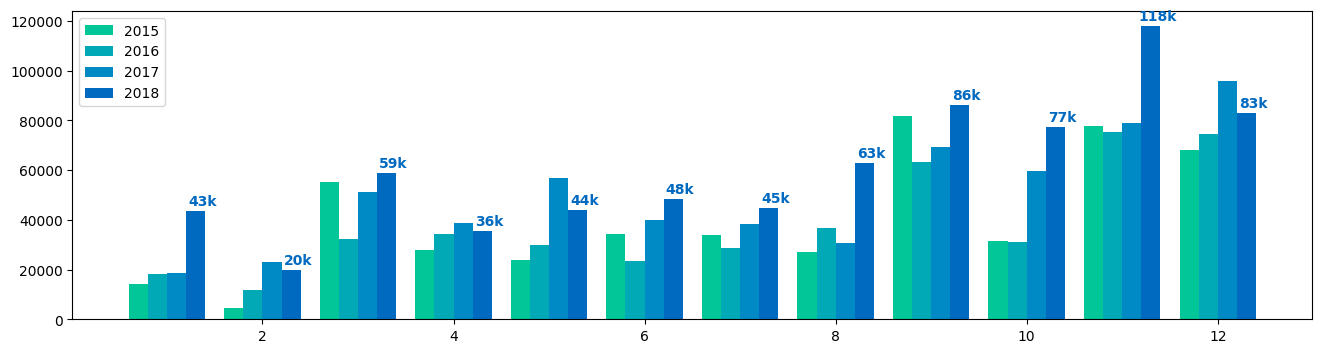

In [35]:
fig,ax = plt.subplots(
            figsize = (16,4) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(sum_month[sum_month.Year == 2015].Month.values-wid-wid/2, # Ajuste da posição das barras
       sum_month[sum_month.Year == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(sum_month[sum_month.Year == 2016].Month.values-wid/2, 
       sum_month[sum_month.Year == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

# Adicionando o restante das barras
ax.bar(sum_month[sum_month.Year == 2017].Month.values+wid/2, 
       sum_month[sum_month.Year == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(sum_month[sum_month.Year == 2018].Month.values+wid+wid/2, 
       sum_month[sum_month.Year == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )
ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in np.arange(0,12):
    ax.annotate('{:,.0f}k'.format(sum_month[sum_month.Year == 2018].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (sum_month[sum_month.Year == 2018].Month.values[i]+wid+wid/2,sum_month[sum_month.Year == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(5,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
            )
    
plt.show()

**Como resultado final, teremos o gráfico abaixo**

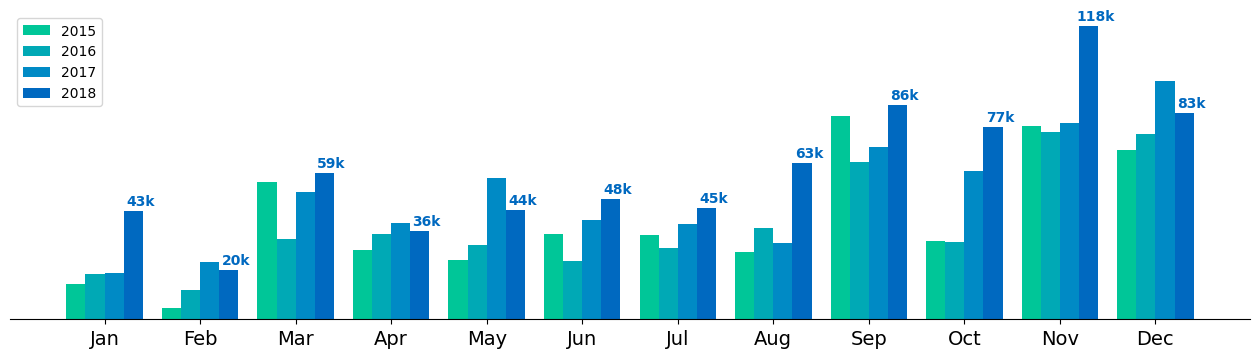

In [36]:
fig,ax = plt.subplots(
            figsize = (16,4) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(sum_month[sum_month.Year == 2015].Month.values-wid-wid/2, # Ajuste da posição das barras
       sum_month[sum_month.Year == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(sum_month[sum_month.Year == 2016].Month.values-wid/2, 
       sum_month[sum_month.Year == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

# Adicionando o restante das barras
ax.bar(sum_month[sum_month.Year == 2017].Month.values+wid/2, 
       sum_month[sum_month.Year == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(sum_month[sum_month.Year == 2018].Month.values+wid+wid/2, 
       sum_month[sum_month.Year == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )
ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in np.arange(0,12):
    ax.annotate('{:,.0f}k'.format(sum_month[sum_month.Year == 2018].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (sum_month[sum_month.Year == 2018].Month.values[i]+wid+wid/2,sum_month[sum_month.Year == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(5,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
            )
    
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13)) # Ajustando os valores de x
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x
    
plt.show()

### 4. <font> Qual foi a category mais vendida? </font>
Precisamos primeiro entender a informação de category

In [37]:
# Podemos fazer um groupby da category
df.groupby("Category")["Sales"].sum()

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

**Como estamos falando de 4 Years diferentes, seria interessante entender como foram essas categorias em cada um dos Years**

In [38]:
# Agrupando por Year e category
df.groupby(["Category","Year"])["Sales"].sum()

Category         Year
Furniture        2015    156477.8811
                 2016    164053.8674
                 2017    195813.0400
                 2018    212313.7872
Office Supplies  2015    149512.8200
                 2016    133124.4070
                 2017    182417.5660
                 2018    240367.5410
Technology       2015    173865.5070
                 2016    162257.7310
                 2017    221961.9440
                 2018    269370.6910
Name: Sales, dtype: float64

**Uma forma de visualizar melhor essas informações é fazer um gráfico de barras com esses dados, bem semelhante ao que fizemos acima**

In [39]:
# Criando agora a base de categorias como fizemos anteriormente
category = df.groupby(["Category","Year"])["Sales"].sum()
category = category.reset_index()

In [40]:
# Visualizando 
filterCatFurniture = category['Category'] == 'Furniture'
category[filterCatFurniture]['Sales'].values

array([156477.8811, 164053.8674, 195813.04  , 212313.7872])

**Utilizando a mesma lógica do gráfico anterior**

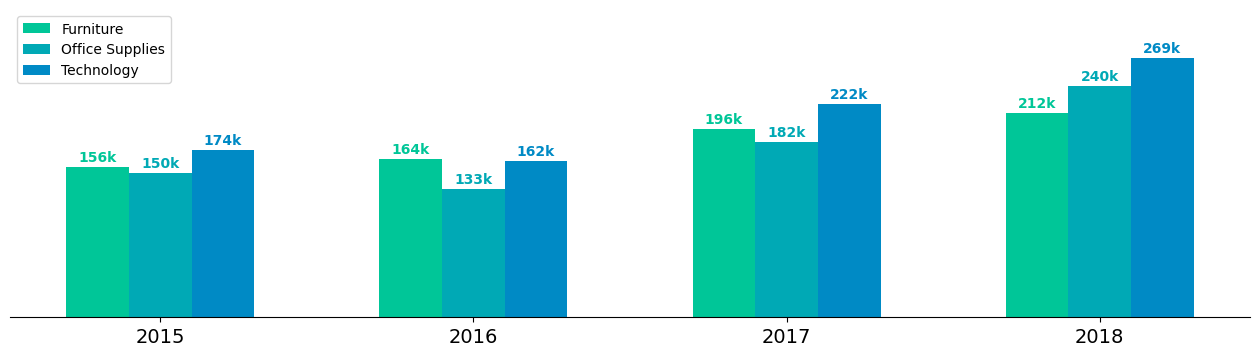

In [41]:
# Vamos utilizar o mesmo código do gráfico anterior para exibir por categorias

fig,ax = plt.subplots(
            figsize = (16,4) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(category[category.Category == 'Furniture'].Year.values-wid, 
       category[category.Category == 'Furniture'].Sales.values,
       color="#00c698", # Cor das barras
       label='Furniture', # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(category[category.Category == 'Office Supplies'].Year.values, 
       category[category.Category == 'Office Supplies'].Sales.values,
       color="#00a9b5", # Cor das barras
       label='Office Supplies', # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(category[category.Category == 'Technology'].Year.values+wid, 
       category[category.Category == 'Technology'].Sales.values,
       color="#008ac5", # Cor das barras
       label='Technology', # Label dos dados
       width=wid # Largura das barras
      )

ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(category[category.Category == 'Furniture'].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (category[category.Category == 'Furniture'].Year.values[i]-wid,category[category.Category == 'Furniture'].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#00c698" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(category[category.Category == 'Office Supplies'].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (category[category.Category == 'Office Supplies'].Year.values[i],category[category.Category == 'Office Supplies'].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#00a9b5" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(category[category.Category == 'Technology'].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (category[category.Category == 'Technology'].Year.values[i]+wid,category[category.Category == 'Technology'].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#008ac5" # Cor dos rótulos
            )
ax.set_yticks(np.array([0,320000])) # Diminuindo o tamanho das barras para não cortar o rótulo
ax.yaxis.set_visible(False) # Retirando os valores do eixo y
    
ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

plt.show()

**Como resultado final, teremos o gráfico abaixo**

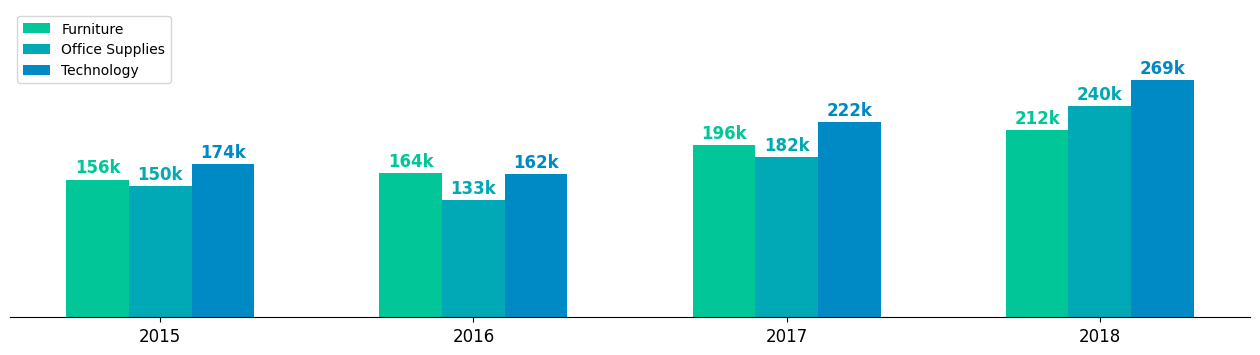

In [42]:
fig,ax = plt.subplots(figsize = (16,4))

wid = 0.2 

ax.bar(category[category.Category == 'Furniture'].Year.values-wid, # Como temos 3 colunas, vamos deslocar a largura da coluna inteira
       category[category.Category == 'Furniture'].Sales.values,
       color="#00c698", 
       label='Furniture', # As legendas agora serão as categorias
       width=wid
      )

ax.bar(category[category.Category == 'Office Supplies'].Year.values, 
       category[category.Category == 'Office Supplies'].Sales.values,
       color="#00a9b5", 
       label='Office Supplies', 
       width=wid
      )

ax.bar(category[category.Category == 'Technology'].Year.values+wid, 
       category[category.Category == 'Technology'].Sales.values,
       color="#008ac5", 
       label='Technology', 
       width=wid
      )

ax.legend()

for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(category[category.Category == 'Furniture'].Sales.values[i]/1000), 
                (category[category.Category == 'Furniture'].Year.values[i]-wid,category[category.Category == 'Furniture'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00c698")
    ax.annotate('{:,.0f}k'.format(category[category.Category == 'Office Supplies'].Sales.values[i]/1000), 
                (category[category.Category == 'Office Supplies'].Year.values[i],category[category.Category == 'Office Supplies'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00a9b5")
    ax.annotate('{:,.0f}k'.format(category[category.Category == 'Technology'].Sales.values[i]/1000), 
                (category[category.Category == 'Technology'].Year.values[i]+wid,category[category.Category == 'Technology'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#008ac5")   
    
ax.set_yticks(np.array([0,350000]))
ax.yaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(2015,2019)) 
ax.tick_params(axis='x',labelsize=12) 

plt.show()

### 4. <font> Qual o item mais vendido? </font>
Vamos seguir exatamente a mesma lógica da category

**Podemos fazer a tabela considerando esses top itens**
- Para pegar uma base, podemos usar o `.head()` que já conhecemos
- Podemos também usar o `.sort_values()` para definirmos se a base será crescente ou descrescente

In [43]:
df.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Year,Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10


In [44]:
# Podemos fazer um groupby do item
itens = df.groupby("ProductName")["Sales"].sum()
itens = itens.reset_index()
itens = itens.sort_values("Sales",ascending=False)
itens.head()

,ProductName,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479


**Uma forma de resolver a quantidade de ítens seria fazer apenas para os top 10 ítens**

In [45]:
# Os top 10 itens são
itens.head(10)

,ProductName,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


In [46]:
# Definindo o top n itens
n = 10
top_n_itens = itens.head(n)
top_n_itens

,ProductName,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


**Vamos traçar um gráfico de barras horizontais para mostrar o top 10 itens**
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
- Podemos usar o `ax.invert_yaxis()` para inverter o eixo y

**Agora agrupando por ítem e Year**

In [47]:
# Podemos fazer um groupby de item e Year
items_year = df.groupby(["ProductName","Year"])["Sales"].sum()
items_year = items_year.reset_index()
items_year

,ProductName,Year,Sales
0,"""While you Were Out"" Message Book, One Form pe...",2018,25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",2016,6.608
2,"#10 Gummed Flap White Envelopes, 100/Box",2017,24.780
3,"#10 Gummed Flap White Envelopes, 100/Box",2018,9.912
4,#10 Self-Seal White Envelopes,2017,86.502
...,...,...,...
5269,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,2018,205.086
5270,netTALK DUO VoIP Telephone Service,2015,335.936
5271,netTALK DUO VoIP Telephone Service,2016,230.956
5272,netTALK DUO VoIP Telephone Service,2017,377.928


In [48]:
# Para visualizar algum item dos top itens
items_year[items_year["ProductName"] == top_n_itens.iloc[2,0]]

,ProductName,Year,Sales
1270,Cisco TelePresence System EX90 Videoconferenci...,2015,22638.48


**Como vamos criar esse gráfico? Como saber quais itens não aparecem em todos os Years?**

### Juntando bases no pandas

**O <font color='blue'>.merge()</font> irá juntar duas bases**
- Para isso, devemos passar:
    - base 1
    - base 2
    - how: forma que iremos fazer essa junção das bases
        - inner: o que tiver em comum entre as 2 bases (base 1 E base 2)
        - outer: tudo o que tiver nas 2 bases (base 1 OU base 2)
        - left: tudo o que tem na PRIMEIRA base, juntando com o que tiver na segunda
        - right: tudo o que tem na SEGUNDA base, juntando com o que tiver na primeira
    - on: colunar que vamos usar para fazer a junção da base

In [49]:
# Criando 2 dataframes
dic1 = {
    "nomes": ['Nome1','Nome2','Nome3'],
    "valores": [1,2,3]
}

base_dic1 = pd.DataFrame(dic1)

dic2 = {
    "nomes": ['Nome1','Nome2','Nome4'],
    "valores": [9,8,7]
}

base_dic2 = pd.DataFrame(dic2)

In [50]:
base_merge = pd.merge(
    base_dic1, # <- primeira base
    base_dic2, # <- segunda base
    how='outer', # <- tipo de junção que vamos fazer
    on="nomes" # <- coluna que vamos usar para fazer essa junção das bases
) 

display(base_merge)

,nomes,valores_x,valores_y
0,Nome1,1.0,9.0
1,Nome2,2.0,8.0
2,Nome3,3.0,NaN
3,Nome4,NaN,7.0


In [51]:
# Temos a nossa base de top itens
top_n_itens

,ProductName,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


**Como podemos cruzar a base com todos os Years de 2015 a 2018?**
- Basta transformar as datas em um DataFrame e usar o merge para fazer essa união

In [52]:
df_datas = pd.DataFrame([2018,2017,2016,2015])
df_datas.columns = ['Year']
df_datas

,Year
0,2018
1,2017
2,2016
3,2015


**Só que pra conseguir unir as bases, precisamos ter uma coluna em comum entre elas**
- Então podemos, nas duas bases, criar uma coluna chamada `uniao` (ou qualquer outro nome) com o mesmo valor

In [53]:
top_n_itens['uniao'] = 'unir'
df_datas['uniao'] = 'unir'

/tmp/ipykernel_8757/2128599823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_n_itens['uniao'] = 'unir'


**Agora que temos uma coluna que conseguimos relacionar, podemos fazer o merge das bases**

In [54]:
items_year = pd.merge(
    top_n_itens, # <- primeira base
    df_datas, # <- segunda base
    how='outer', # <- tipo de junção que vamos fazer
    on="uniao" # <- coluna que vamos usar para fazer essa junção das bases
) 

items_year.head()

,ProductName,Sales,uniao,Year
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018


#### Agora podemos voltar para a base itens_Year e fazer a junção com essa base acima

In [55]:
display(items_year)

,ProductName,Sales,uniao,Year
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018
5,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2017
6,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2016
7,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2015
8,Cisco TelePresence System EX90 Videoconferenci...,22638.480,unir,2018
9,Cisco TelePresence System EX90 Videoconferenci...,22638.480,unir,2017


In [ ]:
items_Year_graphic = pd.merge(
    produto_Year,
    items_year,
    how='left',
    on=['ProductName','Year']
)
        
items_Year_graphic.head()

KeyError: 'Year'

**Agora podemos usar esses dados para traçar o gráfico**

In [ ]:
# Vamos criar o gráfico baseado nesse DataFrame que acabamos de criar

**Como resultado final, teremos o gráfico abaixo**

In [ ]:
# Vamos criar o gráfico baseado nesse DataFrame que acabamos de criar
fig,ax = plt.subplots(
            figsize = (16,12)
        )

hgt = 0.2

qtd_itens = len(top_n_itens)

ax.barh(np.arange(0,qtd_itens)-hgt-hgt/2, #Valores de y
        items_Year_graphic[items_Year_graphic.Year == 2018].Sales_y.values, # Valores de x 
        align='center',
        height=hgt, # Comprimento do gráfico
        label=2018,
        color="#0069c0"
       )
ax.barh(np.arange(0,qtd_itens)-hgt/2, #Valores de y
        items_Year_graphic[items_Year_graphic.Year == 2017].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2017,color="#008ac5")
ax.barh(np.arange(0,qtd_itens)+hgt/2, #Valores de y
        items_Year_graphic[items_Year_graphic.Year == 2016].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2016,color="#00a9b5")
ax.barh(np.arange(0,qtd_itens)+hgt+hgt/2, #Valores de y
        items_Year_graphic[items_Year_graphic.Year == 2015].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2015,color="#00c698")

ax.invert_yaxis() # Inverter o eixo y (deixando o gráfico do maior para o menor)
ax.legend()

for i in np.arange(0,qtd_itens):
    ax.annotate('{:,.1f}k'.format(items_Year_graphic[items_Year_graphic.Year == 2018].Sales_y.values[i]/1000), 
                (items_Year_graphic[items_Year_graphic.Year == 2018].Sales_y.values[i],i-hgt-hgt/2), 
                ha="center", va="top", xytext=(20,6), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#0069c0")
    
ax.yaxis.set_ticks(np.arange(0,qtd_itens)) # Ajustando os valores de x
ax.set_yticklabels(top_n_itens["ProductName"]) # Colocando rótulo no meu eixo
ax.tick_params(axis='y',labelsize=10) # Melhorando o visual do eixo x

ax.xaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

# Resumindo as perguntas

In [ ]:
ax.set_title("VENDAS POR Year", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

In [ ]:
ax.set_title("VENDAS POR MÊS", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

In [ ]:
ax.set_title("VENDAS POR category", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

In [ ]:
ax.set_title("TOP ITENS", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

In [ ]:
ax.set_title("ITENS X YearS", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

### EXTRA: E se quisermos outros tipos de gráficos?